In [1]:
import numpy as np
import pandas as pd
from os import listdir
import random
random.seed()   
import sklearn.mixture as mix
import talib
import matplotlib.pyplot as plt
from matplotlib import cm
import time
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr
from hmmlearn import hmm
np.random.seed(42)
from sklearn.externals import joblib

# Load data from Reuters

In [2]:
import TALIB
data = TALIB.getX('TFMBYc1')
n = len(data.columns)
X =  data[data.columns[0]].values
print(X)
print(n)
    

[ 27.282  27.217  27.368 ...,  19.277  20.14   20.   ]
50


# train model with optimal number of hidden states

In [3]:
for i in range(n):
    X =  data[['TTF_CCI','TTF_ROC','TTF_ROCP','TTF_ROCP','TTF_ROCR100','TTF_ATR','TTF_HT_TRENDMODE',data.columns[i+1]]].values
    model = hmm.GaussianHMM(n_components=2, n_iter=10000).fit(X)
    hidden_states=model.predict(X)    
    returns = ((data['TTF_CLOSE'] - data['TTF_CLOSE'].shift(10))<0)*1
    score = max(sum(returns == hidden_states),len(returns)-sum(returns == hidden_states))/float(len(returns))
    print(data.columns[i+1],score)


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_RSI 0.930662557781
TTF_ADX 0.935285053929
TTF_ADXR 0.937596302003
TTF_CCI 0.925269645609
TTF_DX 0.939137134052
TTF_CMO 0.930662557781
TTF_APO 0.932203389831


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_AROON_DOWN 0.885208012327
TTF_AROON_UP 0.91217257319
TTF_AROONOSC 0.893682588598
TTF_BOP 0.93374422188


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_MACDSIGNALS 0.936055469954
TTF_MACDHIST 0.93374422188
TTF_MFI 0.926810477658
TTF_MINUS_DI 0.925269645609
TTF_MINUS_DM

C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

 0.934514637904
TTF_MOM 0.929892141757
TTF_PLUS_DI 0.926810477658
TTF_PLUS_DM 0.926810477658
TTF_PPO 0.932203389831


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_ROC 0.942218798151
TTF_ROCP 0.942218798151
TTF_ROCR 0.942218798151
TTF_ROCR100 0.942218798151


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_SLOWK 0.919876733436
TTF_SLOWD 0.924499229584
TTF_FASTK 0.925269645609


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_FASTD 0.919876733436
TTF_STOCHRSI0 0.929892141757
TTF_STOCHRSI1 0.925269645609
TTF_TRIX 0.936825885978


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_ULTOSC_x 0.924499229584
TTF_ULTOSC_y 0.924499229584
TTF_ULTOSC 0.924499229584
TTF_WILLR 0.917565485362


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_AD 0.650231124807
TTF_ADOSC 0.936055469954
TTF_OBV 0.626348228043
TTF_ATR 0.939907550077


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_NATR 0.939907550077
TTF_TRANGE 0.93374422188
TTF_HT_DCPERIOD 0.936055469954
TTF_HT_DCPHASE 0.938366718028
TTF_HT_PHASOR_0

C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

 0.936825885978
TTF_HT_PHASOR_1 0.936055469954
TTF_HT_SINE_0 0.926040061633
TTF_HT_SINE_1 0.938366718028
TTF_HT_TRENDMODE 0.931432973806


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


TTF_CDL3OUTSIDE 0.533898305085


IndexError: index 50 is out of bounds for axis 0 with size 50

# Plot graph

C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C

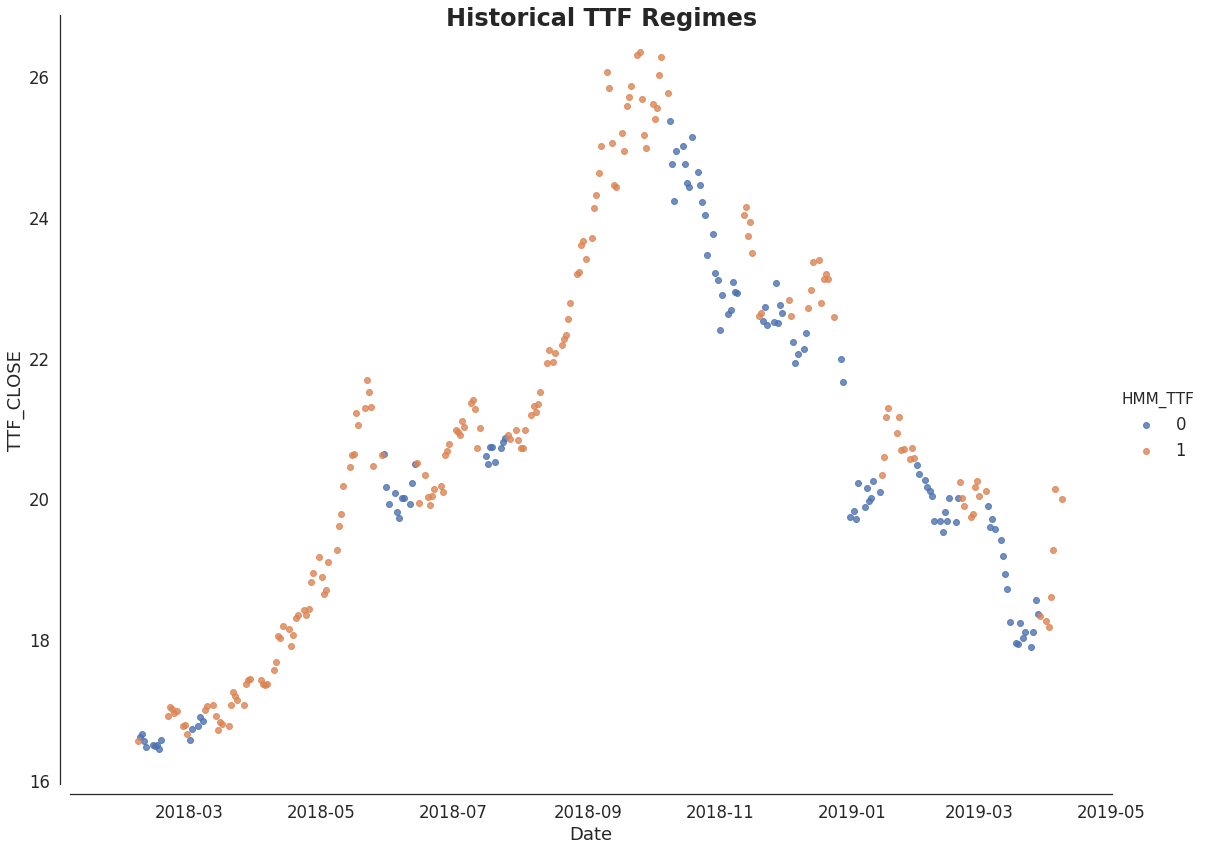

In [13]:
data_train = data[:1000]
data_test = data[1001:]

X_train =  data_train[['TTF_CCI','TTF_ROC','TTF_ROCP','TTF_ROCP','TTF_ROCR100','TTF_ATR','TTF_HT_TRENDMODE']].values
X_test =  data_test[['TTF_CCI','TTF_ROC','TTF_ROCP','TTF_ROCP','TTF_ROCR100','TTF_ATR','TTF_HT_TRENDMODE']].values

# X =  data[['TTF_CLOSE']].values
model = hmm.GaussianHMM(n_components=2, n_iter=10000).fit(X_train)
hidden_states=model.predict(X_test)    
data_test['HMM_TTF'] = hidden_states

style_kwds = {'xtick.major.size': 1, 'ytick.major.size': 1,
              'font.family':u'courier prime code', 'legend.frameon': True}
sns.set(font_scale=1.5)

states = (pd.DataFrame(data, columns=['states'],index=data_test.index).join(data_test, how='inner')
          .reset_index(drop=False)
          )
# print(data.index)
# display(states)
sns.set_style('white', style_kwds)
order = [0,1]
# # order = range(6)
fg = sns.FacetGrid(data=states, hue='HMM_TTF', hue_order=order,
                    aspect=1.31, size=12)
fg.map(plt.scatter, 'Date', 'TTF_CLOSE', alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical TTF Regimes', fontsize=24, fontweight='demi')
fg.savefig('Hidden Markov (Mixture) Model_SPY Regimes.png')